<a href="https://colab.research.google.com/github/wendikardian/exercise_machine_learning/blob/main/Book_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:

from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"wendikardian","key":"8c1011670f54dc1307d99bbedbf7767b"}'}

In [3]:

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets download -d arashnic/book-recommendation-dataset

 88% 21.0M/23.8M [00:02<00:00, 19.0MB/s]
100% 23.8M/23.8M [00:02<00:00, 11.6MB/s]


In [5]:
!mkdir data
!unzip book-recommendation-dataset.zip -d data
!ls data


Archive:  book-recommendation-dataset.zip
  inflating: data/Books.csv          
  inflating: data/Ratings.csv        
  inflating: data/Users.csv          
  inflating: data/recsys_taxonomy2.png  
Books.csv  Ratings.csv	recsys_taxonomy2.png  Users.csv


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
books = pd.read_csv('data/Books.csv')
ratings = pd.read_csv('data/Ratings.csv')
users = pd.read_csv('data/Users.csv')

books

<ipython-input-7-d3740629d9e8>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('data/Books.csv')


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [8]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [9]:
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [10]:
print(books.columns)
print(users.columns)
print(ratings.columns)

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')
Index(['User-ID', 'Location', 'Age'], dtype='object')
Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')


In [11]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [12]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [13]:
print("Missing value form books ", books.isnull().sum())
print("Missing value form users ", users.isnull().sum())
print("Missing value form ratings ", ratings.isnull().sum())

Missing value form books  ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64
Missing value form users  User-ID          0
Location         0
Age         110762
dtype: int64
Missing value form ratings  User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


In [14]:
users = users.drop(columns=['Age'])


print(users.head())

   User-ID                            Location
0        1                  nyc, new york, usa
1        2           stockton, california, usa
2        3     moscow, yukon territory, russia
3        4           porto, v.n.gaia, portugal
4        5  farnborough, hants, united kingdom


In [15]:
books_duplicates_count = books.duplicated().sum()

print("Duplicated rows count in 'books' DataFrame:", books_duplicates_count)

Duplicated rows count in 'books' DataFrame: 0


In [16]:
users_duplicates_count = users.duplicated().sum()
print("Duplicated rows count in 'users' DataFrame:", users_duplicates_count)


Duplicated rows count in 'users' DataFrame: 0


In [17]:
ratings_duplicates_count = ratings.duplicated().sum()
print("Duplicated rows count in 'ratings' DataFrame:", ratings_duplicates_count)

Duplicated rows count in 'ratings' DataFrame: 0


In [18]:
import pandas as pd

total_books = books.shape[0]
total_users = users.shape[0]
total_ratings = ratings.shape[0]

print(f"Total number of rows in the 'Books' dataset: {total_books}")
print(f"Total number of rows in the 'Users' dataset: {total_users}")
print(f"Total number of rows in the 'Ratings' dataset: {total_ratings}")


Total number of rows in the 'Books' dataset: 271360
Total number of rows in the 'Users' dataset: 278858
Total number of rows in the 'Ratings' dataset: 1149780


In [19]:
import pandas as pd

unique_isbns_ratings = ratings['ISBN'].nunique()

print(f"Total number of unique ISBNs in the 'Ratings' dataset: {unique_isbns_ratings}")


Total number of unique ISBNs in the 'Ratings' dataset: 340556


In [20]:
import pandas as pd


unique_user_ids_ratings = ratings['User-ID'].nunique()

print(f"Total number of unique UserIDs in the 'Ratings' dataset: {unique_user_ids_ratings}")


Total number of unique UserIDs in the 'Ratings' dataset: 105283


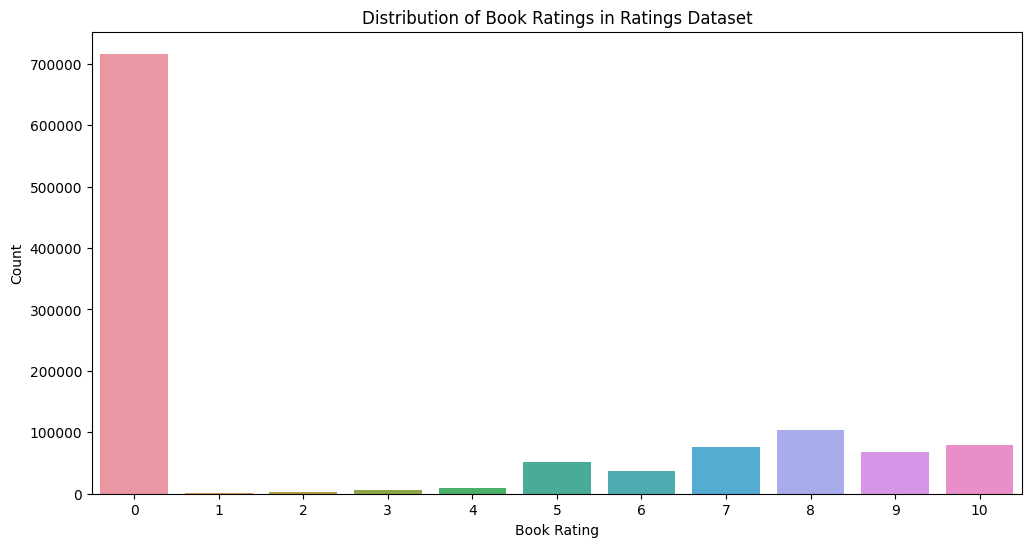

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(x='Book-Rating', data=ratings)
plt.title('Distribution of Book Ratings in Ratings Dataset')
plt.xlabel('Book Rating')
plt.ylabel('Count')
plt.show()

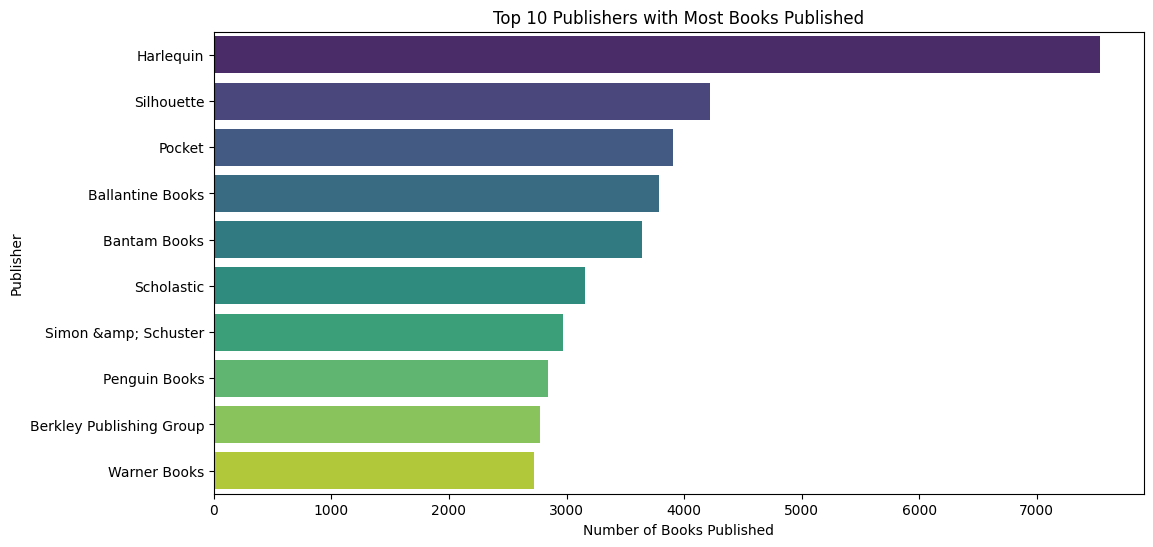

In [22]:
top_publishers = books['Publisher'].value_counts().head(10)


plt.figure(figsize=(12, 6))
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='viridis')
plt.title('Top 10 Publishers with Most Books Published')
plt.xlabel('Number of Books Published')
plt.ylabel('Publisher')
plt.show()

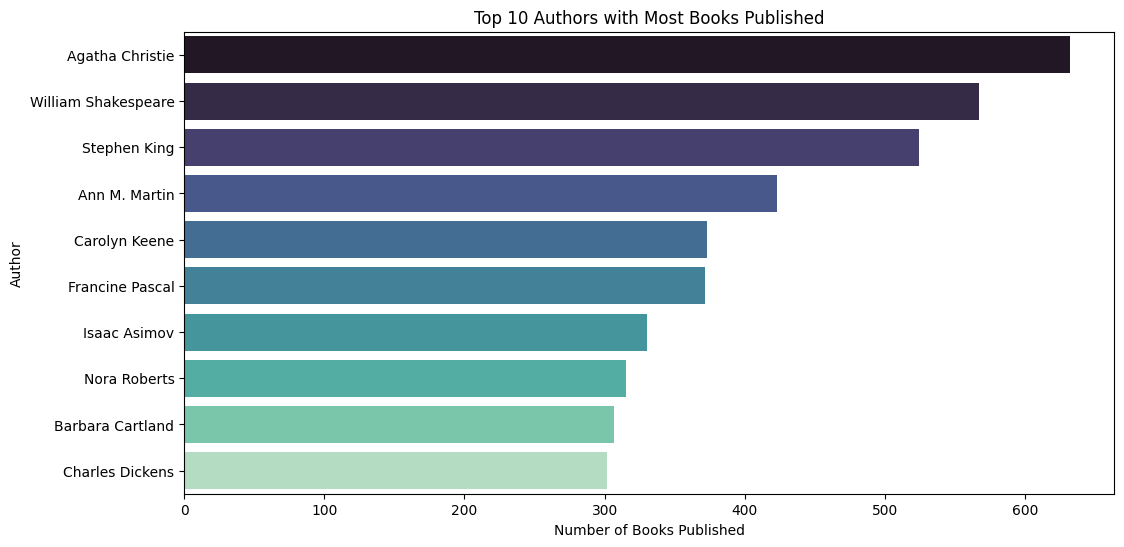

In [23]:
top_authors = books['Book-Author'].value_counts().head(10)


plt.figure(figsize=(12, 6))
sns.barplot(x=top_authors.values, y=top_authors.index, palette='mako')
plt.title('Top 10 Authors with Most Books Published')
plt.xlabel('Number of Books Published')
plt.ylabel('Author')
plt.show()


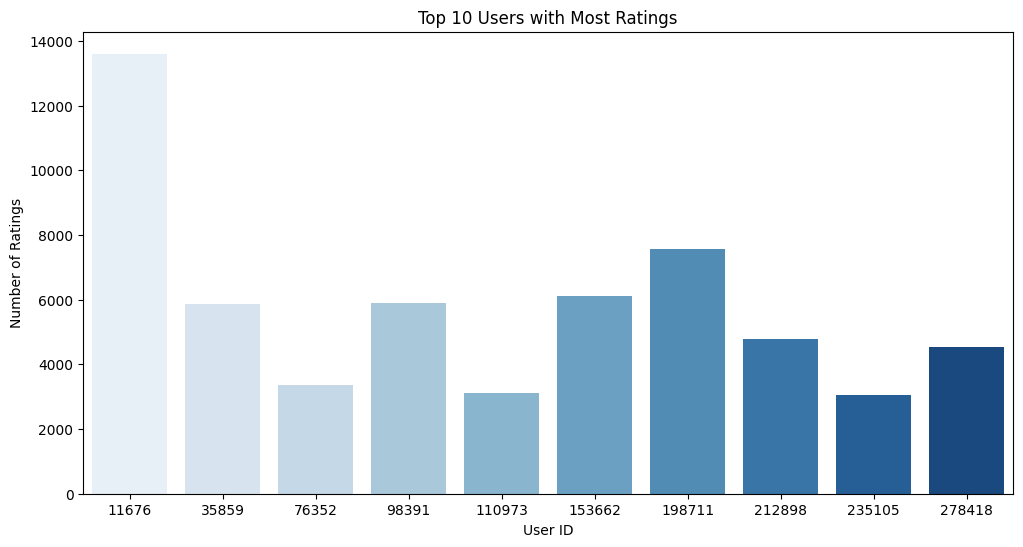

In [24]:
top_rated_users = ratings['User-ID'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_rated_users.index, y=top_rated_users.values, palette='Blues')
plt.title('Top 10 Users with Most Ratings')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.show()

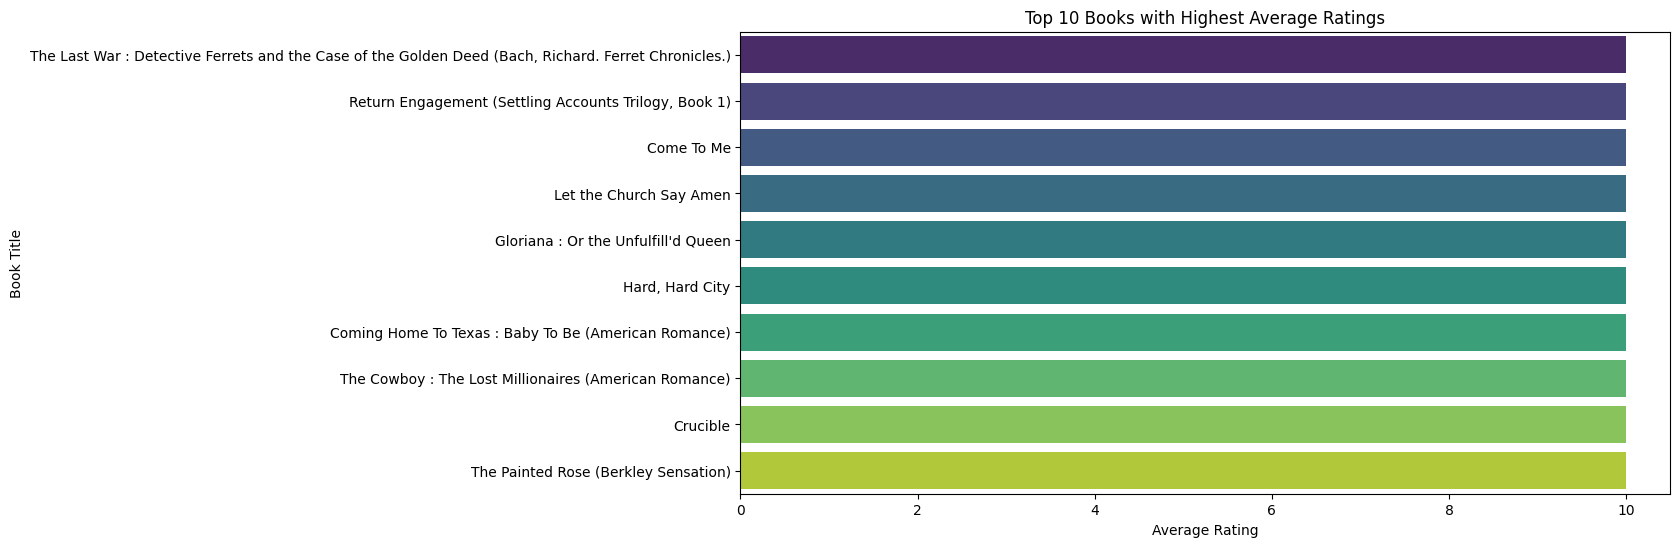

In [25]:
average_ratings = ratings.groupby('ISBN')['Book-Rating'].mean()

books_with_avg_ratings = pd.merge(books, average_ratings, left_on='ISBN', right_index=True, how='left')
books_with_avg_ratings.rename(columns={'Book-Rating': 'Average-Rating'}, inplace=True)

top_rated_books = books_with_avg_ratings.sort_values(by='Average-Rating', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Average-Rating', y='Book-Title', data=top_rated_books, palette='viridis')
plt.title('Top 10 Books with Highest Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Book Title')
plt.show()

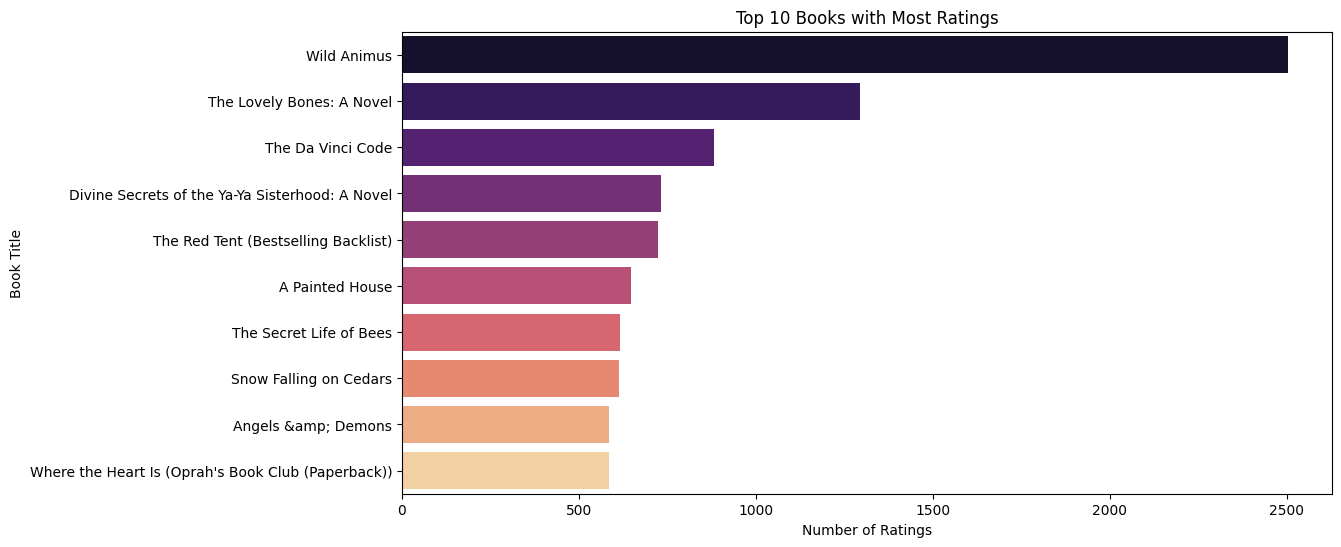

In [26]:
ratings_count = ratings['ISBN'].value_counts()

books_with_ratings_count = pd.merge(books, ratings_count, left_on='ISBN', right_index=True, how='left')
books_with_ratings_count.rename(columns={'ISBN_y': 'Ratings-Count'}, inplace=True)

top_rated_books = books_with_ratings_count.sort_values(by='Ratings-Count', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Ratings-Count', y='Book-Title', data=top_rated_books, palette='magma')
plt.title('Top 10 Books with Most Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Book Title')
plt.show()

In [27]:
unique_user_ids = np.concatenate((
    users['User-ID'].unique(),
    ratings['User-ID'].unique()
))

unique_isbns = np.concatenate((
    books['ISBN'].unique(),
    ratings['ISBN'].unique()
))

unique_user_ids = np.sort(np.unique(unique_user_ids))
unique_isbns = np.sort(np.unique(unique_isbns))

print('Number of unique User-IDs across datasets: ', len(unique_user_ids))
print('Number of unique ISBNs across datasets: ', len(unique_isbns))

Number of unique User-IDs across datasets:  278858
Number of unique ISBNs across datasets:  341765


In [28]:
unique_isbns

array([' 0330299891', ' 0375404120', ' 0586045007', ..., '§423350229',
       '´3499128624', 'Ô½crosoft'], dtype=object)

In [29]:
unique_user_ids

array([     1,      2,      3, ..., 278856, 278857, 278858])

In [30]:
print("before merged")
print("ratings shape:",ratings.shape)
print("Books shape:",books.shape)
books_ratings_collab=ratings.merge(books,on='ISBN')
print("after merged:",books_ratings_collab.shape)

before merged
ratings shape: (1149780, 3)
Books shape: (271360, 8)
after merged: (1031136, 10)


In [31]:
books_ratings_collab

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


In [32]:
books_ratings_collab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   User-ID              1031136 non-null  int64 
 1   ISBN                 1031136 non-null  object
 2   Book-Rating          1031136 non-null  int64 
 3   Book-Title           1031136 non-null  object
 4   Book-Author          1031135 non-null  object
 5   Year-Of-Publication  1031136 non-null  object
 6   Publisher            1031134 non-null  object
 7   Image-URL-S          1031136 non-null  object
 8   Image-URL-M          1031136 non-null  object
 9   Image-URL-L          1031132 non-null  object
dtypes: int64(2), object(8)
memory usage: 86.5+ MB


In [33]:
books_ratings_collab.describe()

,User-ID,Book-Rating
count,1.031136e+06,1.031136e+06
mean,1.405945e+05,2.839051e+00
std,8.052466e+04,3.854157e+00
min,2.000000e+00,0.000000e+00
25%,7.041500e+04,0.000000e+00
50%,1.412100e+05,0.000000e+00
75%,2.114260e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [34]:
grouped_data = books_ratings_collab.groupby(['ISBN', 'User-ID']).agg({'Book-Rating': 'mean'}).reset_index()
grouped_data

,ISBN,User-ID,Book-Rating
0,0000913154,171118,8.0
1,0001010565,86123,0.0
2,0001010565,209516,0.0
3,0001046438,23902,9.0
4,0001046713,196149,0.0
...,...,...,...
1031131,B000234N76,264317,0.0
1031132,B000234NC6,100906,0.0
1031133,B00029DGGO,100088,0.0
1031134,B0002JV9PY,179791,0.0


In [35]:
books_ratings_collab.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L'],
      dtype='object')

In [36]:
books_ratings_collab.isnull().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            4
dtype: int64

In [37]:
books_ratings_clean = books_ratings_collab.dropna()
books_ratings_clean

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


In [38]:
books_ratings_clean.isnull().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [39]:
books_fix = books_ratings_clean.sort_values('ISBN', ascending = True)
books_fix

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
951646,171118,0000913154,8,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967,Simon &amp; Schuster,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...
834527,86123,0001010565,0,Mog's Christmas,Judith Kerr,1992,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...
834528,209516,0001010565,0,Mog's Christmas,Judith Kerr,1992,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...
603167,23902,0001046438,9,Liar,Stephen Fry,0,Harpercollins Uk,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...
976464,196149,0001046713,0,Twopence to Cross the Mersey,Helen Forrester,1992,HarperCollins Publishers,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...
...,...,...,...,...,...,...,...,...,...,...
1025428,264317,B000234N76,0,Falling Angels,Tracy Chevalier,2001,E P Dutton,http://images.amazon.com/images/P/B000234N76.0...,http://images.amazon.com/images/P/B000234N76.0...,http://images.amazon.com/images/P/B000234N76.0...
867884,100906,B000234NC6,0,It Must've Been Something I Ate: The Return of...,Jeffrey Steingarten,2002,Knopf,http://images.amazon.com/images/P/B000234NC6.0...,http://images.amazon.com/images/P/B000234NC6.0...,http://images.amazon.com/images/P/B000234NC6.0...
866355,100088,B00029DGGO,0,"Good Wife Strikes Back, The",Elizabeth Buchan,0,Viking Adult,http://images.amazon.com/images/P/B00029DGGO.0...,http://images.amazon.com/images/P/B00029DGGO.0...,http://images.amazon.com/images/P/B00029DGGO.0...
961274,179791,B0002JV9PY,0,The Blockade Runners,Jules Verne,0,Digireads.com,http://images.amazon.com/images/P/B0002JV9PY.0...,http://images.amazon.com/images/P/B0002JV9PY.0...,http://images.amazon.com/images/P/B0002JV9PY.0...


In [40]:
len(books_fix.ISBN.unique())

270145

In [41]:
books_fix.ISBN.unique()

array(['0000913154', '0001010565', '0001046438', ..., 'B00029DGGO',
       'B0002JV9PY', 'B0002K6K8O'], dtype=object)

In [42]:
len(books_fix['Book-Author'].unique())

101585

In [43]:
preparation = books_fix.drop_duplicates('ISBN')
preparation

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
951646,171118,0000913154,8,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967,Simon &amp; Schuster,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...
834527,86123,0001010565,0,Mog's Christmas,Judith Kerr,1992,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...
603167,23902,0001046438,9,Liar,Stephen Fry,0,Harpercollins Uk,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...
976464,196149,0001046713,0,Twopence to Cross the Mersey,Helen Forrester,1992,HarperCollins Publishers,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...
603168,23902,000104687X,6,"T.S. Eliot Reading \The Wasteland\"" and Other ...",T.S. Eliot,1993,HarperCollins Publishers,http://images.amazon.com/images/P/000104687X.0...,http://images.amazon.com/images/P/000104687X.0...,http://images.amazon.com/images/P/000104687X.0...
...,...,...,...,...,...,...,...,...,...,...
1025428,264317,B000234N76,0,Falling Angels,Tracy Chevalier,2001,E P Dutton,http://images.amazon.com/images/P/B000234N76.0...,http://images.amazon.com/images/P/B000234N76.0...,http://images.amazon.com/images/P/B000234N76.0...
867884,100906,B000234NC6,0,It Must've Been Something I Ate: The Return of...,Jeffrey Steingarten,2002,Knopf,http://images.amazon.com/images/P/B000234NC6.0...,http://images.amazon.com/images/P/B000234NC6.0...,http://images.amazon.com/images/P/B000234NC6.0...
866355,100088,B00029DGGO,0,"Good Wife Strikes Back, The",Elizabeth Buchan,0,Viking Adult,http://images.amazon.com/images/P/B00029DGGO.0...,http://images.amazon.com/images/P/B00029DGGO.0...,http://images.amazon.com/images/P/B00029DGGO.0...
961274,179791,B0002JV9PY,0,The Blockade Runners,Jules Verne,0,Digireads.com,http://images.amazon.com/images/P/B0002JV9PY.0...,http://images.amazon.com/images/P/B0002JV9PY.0...,http://images.amazon.com/images/P/B0002JV9PY.0...


In [44]:
book_ISBN = preparation['ISBN'].tolist()
book_title = preparation['Book-Title'].tolist()
book_author = preparation['Book-Author'].tolist()
book_publisher = preparation['Publisher'].tolist()

print(len(book_ISBN))
print(len(book_title))
print(len(book_author))
print(len(book_publisher))

270145
270145
270145
270145


In [45]:
book_new = pd.DataFrame({
    'isbn' : book_ISBN,
    'title': book_title,
    'author' : book_author,
    'publisher' : book_publisher
})

book_new = book_new.sort_values('author', ascending = True)
book_new = book_new.head(50000)
book_new

,isbn,title,author,publisher
36236,0312956762,Die Hard: With a Vengeance - A Novel,D. Chiel,St Martins Pr
45889,034545006X,The Taking,J. D. Landis,Ballantine Books
232474,1579651372,Ruskin's Rose: A Venetian Love Story,Mimma Balia,Artisan Publishers
88069,0440416361,Nsync : The Official Book,'N Sync,Delacorte Press
216006,0972066713,The Mom-to-Mom Guide to the Baby Years: Review...,142 moms from all over the world,"Sound Bite Press, Inc."
...,...,...,...,...
231543,1576832961,Renovation of the Heart: Putting on the Charac...,Dallas Willard,Navpress Publishing Group
68854,0385296916,The Ninth Issue,Dallin Malgreen,Random House Childrens Books
99539,0451176200,The Erotic Silence of the American Wife,Dalma Heyn,New Amer Library (Mm)
143746,0679457739,Marriage Shock: The Transformation of Women in...,Dalma Heyn,Random House Inc


In [46]:
data = book_new
data.sample(5)

,isbn,title,author,publisher
43888,0345366514,Court of Shadows,Cynthia Morgan,Ballantine Books
59259,0373833326,New Years Resolution Family,Anne McAllister,Harlequin
53434,037324293X,Doctor'S Vow (Prescription Marriage) (Silhouet...,Christine Rimmer,Silhouette
18538,0140308946,Pippi Longstocking (Puffin Books),Astrid Lindgren,Puffin
4140,0060173890,"Frankly Scarlett, I Do Give a Damn!: Classic R...",Beverly West,Harpercollins


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
tf.fit(data['author'])

tf.get_feature_names_out()

array(['142', '1962', '1977', ..., 'â¼nchhausen', 'â¼ter', 'â¼tting'],
      dtype=object)

In [48]:
tfidf_matrix = tf.fit_transform(data['author'])

tfidf_matrix.shape

(50000, 13009)

In [49]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [50]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns = tf.get_feature_names_out(),
    index = data.title,
).sample(22, axis = 1).sample(10, axis = 0)

,witting,consumers,nikiforuk,chardiet,maracle,hitler,collections,fullerton,meigs,smart,...,hussain,brenchley,carluccio,hicks,miles,dakin,nersesian,ngozi,chateaubriand,mcfarland
title,,,,,,,,,,,,,,,,,,,,,
Tamarisk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"The Fall of the Perfect Girl (Surviving Sixteen, No 2)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Irish Stew!,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Globalhead,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Rah Rah Girls,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sole Survivor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gigi and the Cat (Penguin Twentieth-Century Classics),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballata per un'estate calda (Narratori Giunti),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
New Friends in a New Land: A Thanksgiving Story (Stories of America (Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
from sklearn.metrics.pairwise import cosine_similarity


cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [52]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['title'], columns = data['title'])
print('Shape : ', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis = 1).sample(10, axis = 0)

Shape :  (50000, 50000)


title,The Tesseract,In den Armen der MÃ?Â¤nner. Roman.,e-Business Intelligence: Turning Information into Knowledge into Profit,SchÃ?Â¶ne neue Welt. 50 Kolumnen aus Berlin und New York.,MY TEACHER IS AN ALIEN
title,,,,,
Black Coffee (Hercule Poirot Mysteries (Hardcover)),0.0,0.0,0.0,0.0,0.0
More travels in a donkey trap,0.0,0.0,0.0,0.0,0.0
Vaters Stolz.,0.0,0.0,0.0,0.0,0.0
Galgenlieder,0.0,0.0,0.0,0.0,0.0
A Little Book of Campfire Songs,0.0,0.0,0.0,0.0,0.0
Cosmic Connection: an Extraterrestrial Perspective,0.0,0.0,0.0,0.0,0.0
Penguin Readers Level 6: the Beach (Penguin Readers),1.0,0.0,0.0,0.0,0.0
"Fascination in France (Camfield Novels of Love, No 149)",0.0,0.0,0.0,0.0,0.0
Chinese Style: The Art of Living,0.0,0.0,0.0,0.0,0.0


In [53]:
def book_recommendations(title, similarity_data=cosine_sim_df, items=data[['title', 'author']], k=5):
    """
    Rekomendasi Resto berdasarkan kemiripan dataframe

    Parameter:
    ---
    title : tipe data string (str)
                Nama Buku (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan buku sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---


    Pada index ini, kita mengambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """

    index = similarity_data.loc[:,title].to_numpy().argpartition(
        range(-1, -k, -1))

    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    closest = closest.drop(title, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [54]:
data.sample(2)

,isbn,title,author,publisher
227892,1569314284,Night Warriors : Darkstalkers' Revenge (Night ...,Bob Jones,VIZ LLC
63095,0380009897,Delta Blood,Barbara Ferry Johnson,Harper Mass Market Paperbacks (Mm)


In [55]:
book_recommendations("In a Country of Mothers")

,title,author
0,Things You Should Know : A Collection of Stories,A. M. Homes
1,Things You Should Know : A Collection of Stories,A. M. Homes
2,Some Things You Should Know (A Collection of S...,A.M. Homes
3,In a Country of Mothers (Vintage Contemporaries),A.M. HOMES
4,END OF ALICE : A Novel,A.M. Homes


In [56]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [57]:
df = ratings
df = df.head(50000)
df

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
49995,11676,0445405457,7
49996,11676,0445408502,0
49997,11676,0445409134,0
49998,11676,0445409169,0


In [90]:
user_ids = df['User-ID'].unique().tolist()
print('list userID: ', user_ids)

user_to_user_encoded = {
    x: i for i, x in enumerate(user_ids)
}
# print('encoded userID : ', user_to_user_encoded)

user_encoded_to_user = {
    i : x for i, x in enumerate(user_ids)
}
user_to_user_encoded
# print('encoded angka ke userID : ', user_encoded_to_user)

list userID:  [276725, 276726, 276727, 276729, 276733, 276736, 276737, 276744, 276745, 276746, 276747, 276748, 276751, 276754, 276755, 276760, 276762, 276765, 276768, 276772, 276774, 276780, 276786, 276788, 276796, 276798, 276800, 276803, 276804, 276806, 276808, 276811, 276812, 276813, 276814, 276817, 276820, 276822, 276827, 276828, 276830, 276832, 276833, 276835, 276837, 276838, 276840, 276842, 276847, 276848, 276850, 276852, 276853, 276854, 276856, 276857, 276859, 276861, 276862, 276863, 276866, 276869, 276870, 276872, 276873, 276875, 276878, 276879, 276884, 276887, 276888, 276889, 276890, 276896, 276904, 276905, 276911, 276912, 276915, 276916, 276925, 276927, 276928, 276929, 276934, 276936, 276939, 276943, 276946, 276949, 276950, 276953, 276954, 276957, 276959, 276963, 276964, 276965, 276975, 276981, 276984, 276986, 276988, 276989, 276990, 276992, 276994, 276997, 276998, 277002, 277007, 277009, 277010, 277012, 277018, 277019, 277022, 277023, 277028, 277031, 277032, 277035, 277036, 2

{276725: 0,
 276726: 1,
 276727: 2,
 276729: 3,
 276733: 4,
 276736: 5,
 276737: 6,
 276744: 7,
 276745: 8,
 276746: 9,
 276747: 10,
 276748: 11,
 276751: 12,
 276754: 13,
 276755: 14,
 276760: 15,
 276762: 16,
 276765: 17,
 276768: 18,
 276772: 19,
 276774: 20,
 276780: 21,
 276786: 22,
 276788: 23,
 276796: 24,
 276798: 25,
 276800: 26,
 276803: 27,
 276804: 28,
 276806: 29,
 276808: 30,
 276811: 31,
 276812: 32,
 276813: 33,
 276814: 34,
 276817: 35,
 276820: 36,
 276822: 37,
 276827: 38,
 276828: 39,
 276830: 40,
 276832: 41,
 276833: 42,
 276835: 43,
 276837: 44,
 276838: 45,
 276840: 46,
 276842: 47,
 276847: 48,
 276848: 49,
 276850: 50,
 276852: 51,
 276853: 52,
 276854: 53,
 276856: 54,
 276857: 55,
 276859: 56,
 276861: 57,
 276862: 58,
 276863: 59,
 276866: 60,
 276869: 61,
 276870: 62,
 276872: 63,
 276873: 64,
 276875: 65,
 276878: 66,
 276879: 67,
 276884: 68,
 276887: 69,
 276888: 70,
 276889: 71,
 276890: 72,
 276896: 73,
 276904: 74,
 276905: 75,
 276911: 76,
 276912: 

In [59]:
book_isbn = df['ISBN'].unique().tolist()

book_to_book_encoded = {
    x: i for i, x in enumerate(book_isbn)
}

book_encoded_to_book = {
    i: x for i, x in enumerate(book_isbn)
}

book_encoded_to_book

{0: '034545104X',
 1: '0155061224',
 2: '0446520802',
 3: '052165615X',
 4: '0521795028',
 5: '2080674722',
 6: '3257224281',
 7: '0600570967',
 8: '038550120X',
 9: '342310538',
 10: '0425115801',
 11: '0449006522',
 12: '0553561618',
 13: '055356451X',
 14: '0786013990',
 15: '0786014512',
 16: '0060517794',
 17: '0451192001',
 18: '0609801279',
 19: '0671537458',
 20: '0679776818',
 21: '0943066433',
 22: '1570231028',
 23: '1885408226',
 24: '0747558167',
 25: '3442437407',
 26: '033390804X',
 27: '3596218098',
 28: '0684867621',
 29: '0451166892',
 30: '8440682697',
 31: '034544003X',
 32: '0380000059',
 33: '0380711524',
 34: '0451167317',
 35: '0451454952',
 36: '0843920262',
 37: '3404122879',
 38: '3404182928',
 39: '3404611306',
 40: '342662429',
 41: '3426690179',
 42: '3442424216',
 43: '3442425573',
 44: '3453092007',
 45: '3453157745',
 46: '3453176944',
 47: '3453185137',
 48: '3453185323',
 49: '3453213025',
 50: '3453877241',
 51: '3492226604',
 52: '3517017442',
 53: 

In [60]:
df['user'] = df['User-ID'].map(user_to_user_encoded)

df['book'] = df['ISBN'].map(book_to_book_encoded)

df

<ipython-input-60-41a83691676b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user'] = df['User-ID'].map(user_to_user_encoded)
<ipython-input-60-41a83691676b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['book'] = df['ISBN'].map(book_to_book_encoded)


,User-ID,ISBN,Book-Rating,user,book
0,276725,034545104X,0,0,0
1,276726,0155061224,5,1,1
2,276727,0446520802,0,2,2
3,276729,052165615X,3,3,3
4,276729,0521795028,6,3,4
...,...,...,...,...,...
49995,11676,0445405457,7,5063,36280
49996,11676,0445408502,0,5063,21549
49997,11676,0445409134,0,5063,2036
49998,11676,0445409169,0,5063,27112


In [61]:
num_users = len(user_to_user_encoded)
print(num_users)

num_book = len(book_encoded_to_book)
print(num_book)

df['rating'] = df['Book-Rating'].values.astype(np.float32)
min_rating = min(df['rating'])
max_rating = max(df['rating'])
print('Number of user : {}, Number of book : {}, Min Rating : {}, Max Rating : {}'. format(num_users, num_book, min_rating, max_rating))

5064
36282
Number of user : 5064, Number of book : 36282, Min Rating : 0.0, Max Rating : 10.0


<ipython-input-61-a1524d94f3af>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['Book-Rating'].values.astype(np.float32)


In [62]:
df = df.sample(frac = 1, random_state = 42)
df

,User-ID,ISBN,Book-Rating,user,book,rating
33553,7930,0679751521,8,3745,1730,8.0
9427,278798,0345460359,0,825,8864,0.0
199,276847,347354034X,7,48,198,7.0
12447,1211,0723206015,0,1265,11278,0.0
39489,9660,0440193613,5,4354,1599,5.0
...,...,...,...,...,...,...
11284,651,1888451084,7,1071,10381,7.0
44732,11601,0802116825,0,5035,12546,0.0
38158,9046,0826452450,7,4143,29073,7.0
860,277087,8472230082,5,139,850,5.0


In [63]:
x = df[['user', 'book']].values


y = df['rating'].apply(lambda x : (x - min_rating) / (max_rating - min_rating)).values

train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)


print(x, y)

[[ 3745  1730]
 [  825  8864]
 [   48   198]
 ...
 [ 4143 29073]
 [  139   850]
 [ 1706 13939]] [0.8 0.  0.7 ... 0.7 0.5 0. ]


In [64]:
class RecommenderNet(tf.keras.Model):
  def __init__(self, num_users, num_book, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_book = num_book
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.book_embedding = layers.Embedding(
        num_book,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.book_bias = layers.Embedding(num_book, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:, 0])
    user_bias = self.user_bias(inputs[:, 0])
    book_vector = self.book_embedding(inputs[:, 1])
    book_bias = self.book_bias(inputs[:, 1])

    dot_user_book = tf.tensordot(user_vector, book_vector, 2)

    x = dot_user_book + user_bias + book_bias

    return tf.nn.sigmoid(x)

In [65]:
model = RecommenderNet(num_users, num_book, 50)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    metrics = [tf.keras.metrics.RootMeanSquaredError()]
)

In [66]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 10,
    validation_data = (x_val, y_val)
)

Epoch 1/10
5000/5000 [==============================] - 26s 4ms/step - loss: 0.6194 - root_mean_squared_error: 0.3916 - val_loss: 0.5759 - val_root_mean_squared_error: 0.3669
Epoch 2/10
5000/5000 [==============================] - 20s 4ms/step - loss: 0.5462 - root_mean_squared_error: 0.3510 - val_loss: 0.5605 - val_root_mean_squared_error: 0.3590
Epoch 3/10
5000/5000 [==============================] - 22s 4ms/step - loss: 0.5229 - root_mean_squared_error: 0.3367 - val_loss: 0.5530 - val_root_mean_squared_error: 0.3548
Epoch 4/10
5000/5000 [==============================] - 21s 4ms/step - loss: 0.5076 - root_mean_squared_error: 0.3270 - val_loss: 0.5489 - val_root_mean_squared_error: 0.3526
Epoch 5/10
5000/5000 [==============================] - 20s 4ms/step - loss: 0.4931 - root_mean_squared_error: 0.3178 - val_loss: 0.5465 - val_root_mean_squared_error: 0.3512
Epoch 6/10
5000/5000 [==============================] - 23s 5ms/step - loss: 0.4825 - root_mean_squared_error: 0.3108 - val_l

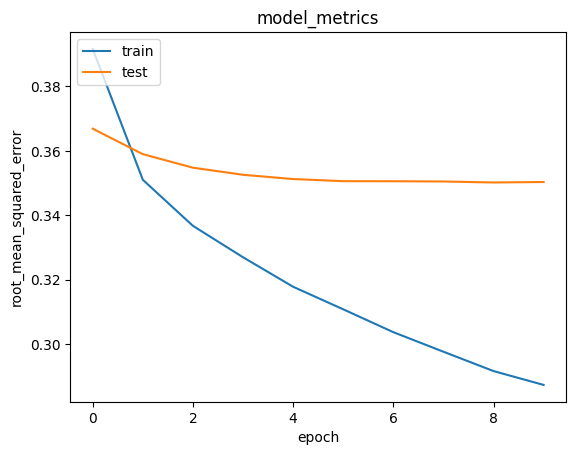

In [67]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [71]:
book_new

,isbn,title,author,publisher
36236,0312956762,Die Hard: With a Vengeance - A Novel,D. Chiel,St Martins Pr
45889,034545006X,The Taking,J. D. Landis,Ballantine Books
232474,1579651372,Ruskin's Rose: A Venetian Love Story,Mimma Balia,Artisan Publishers
88069,0440416361,Nsync : The Official Book,'N Sync,Delacorte Press
216006,0972066713,The Mom-to-Mom Guide to the Baby Years: Review...,142 moms from all over the world,"Sound Bite Press, Inc."
...,...,...,...,...
231543,1576832961,Renovation of the Heart: Putting on the Charac...,Dallas Willard,Navpress Publishing Group
68854,0385296916,The Ninth Issue,Dallin Malgreen,Random House Childrens Books
99539,0451176200,The Erotic Silence of the American Wife,Dalma Heyn,New Amer Library (Mm)
143746,0679457739,Marriage Shock: The Transformation of Women in...,Dalma Heyn,Random House Inc


In [93]:
book_df = book_new

data = pd.read_csv('data/Ratings.csv')
user_id = df['User-ID'].sample(1).iloc[0]
book_read_by_user = data[data['User-ID'] == user_id]


book_not_rated = book_df[~book_df['isbn'].isin(book_read_by_user.ISBN.values)]['isbn']
book_not_rated = list(
    set(book_not_rated).intersection(set(book_to_book_encoded.keys()))
)
book_not_rated = [[book_to_book_encoded.get(x)] for x in book_not_rated ]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_rated), book_not_rated)
)
user_book_array

array([[20342, 31430],
       [20342, 11396],
       [20342, 13474],
       ...,
       [20342, 28724],
       [20342, 14428],
       [20342,  9536]])

In [100]:
book_df

,isbn,title,author,publisher
36236,0312956762,Die Hard: With a Vengeance - A Novel,D. Chiel,St Martins Pr
45889,034545006X,The Taking,J. D. Landis,Ballantine Books
232474,1579651372,Ruskin's Rose: A Venetian Love Story,Mimma Balia,Artisan Publishers
88069,0440416361,Nsync : The Official Book,'N Sync,Delacorte Press
216006,0972066713,The Mom-to-Mom Guide to the Baby Years: Review...,142 moms from all over the world,"Sound Bite Press, Inc."
...,...,...,...,...
231543,1576832961,Renovation of the Heart: Putting on the Charac...,Dallas Willard,Navpress Publishing Group
68854,0385296916,The Ninth Issue,Dallin Malgreen,Random House Childrens Books
99539,0451176200,The Erotic Silence of the American Wife,Dalma Heyn,New Amer Library (Mm)
143746,0679457739,Marriage Shock: The Transformation of Women in...,Dalma Heyn,Random House Inc


In [105]:
ratings = model.predict(user_book_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_book_ids = [
    book_encoded_to_book.get(book_not_rated[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users : {}'.format(user_id))
print('===' * 9)
print('book with high ratings from user')
print('----' * 8)

top_book_user = (
    book_read_by_user.sort_values(by='Book-Rating', ascending=False)
).head(5).ISBN.values

book_df_rows = book_df[book_df['isbn'].isin(top_book_user)]
for row in book_df_rows.itertuples():
  print(row.title, ':', row.author)


print('----' * 8)
print('Top 10 book recommendation')
print('----' * 8)

recommended_book = book_df[book_df['isbn'].isin(recommended_book_ids)]
for row in recommended_book.itertuples():
  print(row.title, ':', row.author)

185/185 [==============================] - 1s 3ms/step
Showing recommendations for users : 51655
book with high ratings from user
--------------------------------
A Sudden Change of Heart : Barbara Taylor Bradford
--------------------------------
Top 10 book recommendation
--------------------------------
Tears of the Giraffe (No.1 Ladies Detective Agency) : Alexander McCall Smith
Queen of the Darkness (Black Jewels Trilogy) : Anne Bishop
The Poisonwood Bible : Barbara Kingsolver
Small Wonder: Essays : Barbara Kingsolver
Prodigal Summer : Barbara Kingsolver
Notes From a Small Planet : Bill Bryson
The Watsons Go to Birmingham - 1963 (Yearling Newbery) : CHRISTOPHER PAUL CURTIS
The Alienist : Caleb Carr
Sister of My Heart : Chitra Banerjee Divakaruni
Dragonfly in Amber : DIANA GABALDON
